In [29]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [30]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [31]:
import pandas as pd 
import numpy as np

In [32]:
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS, ZS_OPTS_LEGEND
from SSMuLA.vis_summary import ZS_COLOR_MAP_APPENDED
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

In [33]:
# test if emb > oh
mlde_old = pd.read_csv("results/mlde/vis_5/all_df.csv")
emd_mlde = pd.read_csv("results/mlde_emb/vis/all_df.csv")

In [34]:
mlde = pd.concat([mlde_old, emd_mlde], axis=0)
mlde

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,192,4000,0,0.935697,0.153123,1.000000,0.409558,0.892434,0.437613,1.0,199.0,all,DHFR,Triad-esm_score,384,max
1,one-hot,boosting,192,4000,1,0.813921,0.164246,1.000000,0.455075,0.928627,0.482690,1.0,88.0,all,DHFR,Triad-esm_score,384,max
2,one-hot,boosting,192,4000,2,0.798997,0.163849,1.000000,0.490490,0.931763,0.446393,1.0,82.0,all,DHFR,Triad-esm_score,384,max
3,one-hot,boosting,192,4000,3,0.997845,0.157741,1.000000,0.484294,0.928540,0.406754,1.0,0.0,all,DHFR,Triad-esm_score,384,max
4,one-hot,boosting,192,4000,4,0.752007,0.146420,0.865538,0.456413,0.913301,0.445943,0.0,520.0,all,DHFR,Triad-esm_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464395,esm2_t33_650M_UR50D-mean_site,ridge,1920,159129,45,0.188912,0.020619,0.800478,0.466590,0.986214,0.273096,0.0,416.0,all,TrpB4,none,96,max
464396,esm2_t33_650M_UR50D-mean_site,ridge,1920,159129,46,0.170227,0.019001,0.688532,0.422841,0.987210,0.264410,0.0,5840.0,all,TrpB4,none,96,max
464397,esm2_t33_650M_UR50D-mean_site,ridge,1920,159129,47,0.197283,0.021621,0.922559,0.531315,0.988216,0.251197,0.0,1020.0,all,TrpB4,none,96,max
464398,esm2_t33_650M_UR50D-mean_site,ridge,1920,159129,48,0.202278,0.022021,0.922559,0.461698,0.986600,0.267240,0.0,170.0,all,TrpB4,none,96,max


In [35]:
mlde["encoding"].unique()

array(['one-hot', 'esm2_t33_650M_UR50D-flatten_site',
       'esm2_t33_650M_UR50D-mean_all', 'esm2_t33_650M_UR50D-mean_site'],
      dtype=object)

In [36]:
encoding_style = {
    'one-hot': "solid",
    'esm2_t33_650M_UR50D-flatten_site': "dashed",
    'esm2_t33_650M_UR50D-mean_all': "dashdot",
    'esm2_t33_650M_UR50D-mean_site': "dotted"
}

In [37]:
mlde.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top', 'scale_fit'],
      dtype='object')

In [38]:
"""fig, ax = plt.subplots(1,2,  figsize=(10, 4), sharey=True)

for zs in ["none"] + ZS_OPTS:
    if zs == "ed_score":
        c = PRESENTATION_PALETTE_SATURATE["orange"]
    else:
        c = ZS_COLOR_MAP_APPENDED[zs]
    for encoding in all_slice["encoding"].unique():
        slice_df_ = all_slice[
            (all_slice["zs"] == zs) & (all_slice["encoding"] == encoding)
        ]
        ax[0].plot(
            slice_df_["n_sample"],
            slice_df_["top_maxes_mean"],
            color=c,
            linestyle=encoding_style[encoding],
            # label = zs + encoding
        )
        ax[1].plot(
            slice_df_["n_sample"],
            slice_df_["if_truemaxs_mean"],
            color=c,
            linestyle=encoding_style[encoding],
            label = zs + encoding
            )
# ax.set_title(f"zs={zs}")
ax[0].set_xscale("log")
ax[1].set_xscale("log")
# ax.set_xlabel("n_sample")
# ax.set_ylabel("top_maxes")
# ax[1].legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()"""

'fig, ax = plt.subplots(1,2,  figsize=(10, 4), sharey=True)\n\nfor zs in ["none"] + ZS_OPTS:\n    if zs == "ed_score":\n        c = PRESENTATION_PALETTE_SATURATE["orange"]\n    else:\n        c = ZS_COLOR_MAP_APPENDED[zs]\n    for encoding in all_slice["encoding"].unique():\n        slice_df_ = all_slice[\n            (all_slice["zs"] == zs) & (all_slice["encoding"] == encoding)\n        ]\n        ax[0].plot(\n            slice_df_["n_sample"],\n            slice_df_["top_maxes_mean"],\n            color=c,\n            linestyle=encoding_style[encoding],\n            # label = zs + encoding\n        )\n        ax[1].plot(\n            slice_df_["n_sample"],\n            slice_df_["if_truemaxs_mean"],\n            color=c,\n            linestyle=encoding_style[encoding],\n            label = zs + encoding\n            )\n# ax.set_title(f"zs={zs}")\nax[0].set_xscale("log")\nax[1].set_xscale("log")\n# ax.set_xlabel("n_sample")\n# ax.set_ylabel("top_maxes")\n# ax[1].legend(loc="upper lef

In [39]:
mlde[mlde["n_top"]==96].set_index(["lib", "zs", "encoding"])

model  n_sample  \
lib   zs              encoding                                            
DHFR  Triad-esm_score one-hot                        boosting       192   
                      one-hot                        boosting       192   
                      one-hot                        boosting       192   
                      one-hot                        boosting       192   
                      one-hot                        boosting       192   
...                                                       ...       ...   
TrpB4 none            esm2_t33_650M_UR50D-mean_site     ridge      1920   
                      esm2_t33_650M_UR50D-mean_site     ridge      1920   
                      esm2_t33_650M_UR50D-mean_site     ridge      1920   
                      esm2_t33_650M_UR50D-mean_site     ridge      1920   
                      esm2_t33_650M_UR50D-mean_site     ridge      1920   

                                                     ft_lib  rep  all_maxes  \
lib   zs              encoding                                                
DHFR  Triad-esm_score one-hot                          4000    0   0.935697   
                      one-hot                          4000    1   0.813921   
                      one-hot                          4000    2   0.798997   
                      one-hot                          4000    3   0.997845   
                      one-hot                          4000    4   0.752007   
...                                                     ...  ...        ...   
TrpB4 none            esm2_t33_650M_UR50D-mean_site  159129   45   0.188912   
                      esm2_t33_650M_UR50D-mean_site  159129   46   0.170227   
                      esm2_t33_650M_UR50D-mean_site  159129   47   0.197283   
                      esm2_t33_650M_UR50D-mean_site  159129   48   0.202278   
                      esm2_t33_650M_UR50D-mean_site  159129   49   0.242429   

                                                     all_means  top_maxes  \
lib   zs              encoding                                              
DHFR  Triad-esm_score one-hot                         0.153123   0.982530   
                      one-hot                         0.164246   1.000000   
                      one-hot                         0.163849   1.000000   
                      one-hot                         0.157741   1.000000   
                      one-hot                         0.146420   0.865538   
...                                                        ...        ...   
TrpB4 none            esm2_t33_650M_UR50D-mean_site   0.020619   0.800478   
                      esm2_t33_650M_UR50D-mean_site   0.019001   0.688532   
                      esm2_t33_650M_UR50D-mean_site   0.021621   0.922559   
                      esm2_t33_650M_UR50D-mean_site   0.022021   0.922559   
                      esm2_t33_650M_UR50D-mean_site   0.022053   0.832570   

                                                     top_means     ndcgs  \
lib   zs              encoding                                             
DHFR  Triad-esm_score one-hot                         0.451361  0.892434   
                      one-hot                         0.604757  0.928627   
                      one-hot                         0.585007  0.931763   
                      one-hot                         0.549602  0.928540   
                      one-hot                         0.512380  0.913301   
...                                                        ...       ...   
TrpB4 none            esm2_t33_650M_UR50D-mean_site   0.466590  0.986214   
                      esm2_t33_650M_UR50D-mean_site   0.422841  0.987210   
                      esm2_t33_650M_UR50D-mean_site   0.531315  0.988216   
                      esm2_t33_650M_UR50D-mean_site   0.461698  0.986600   
                      esm2_t33_650M_UR50D-mean_site   0.527574  0.986464   

                                                         rhos

In [40]:
mlde[(mlde["n_top"]==96)&(mlde["zs"].isin(ZS_OPTS))&(mlde["n_mut_cutoff"]=="all")].set_index(["lib", "zs", "encoding"])[["n_sample","top_maxes", "if_truemaxs"]].groupby(["lib", "zs", "encoding", "n_sample"]).agg(["mean", "std"])

top_maxes  \
                                                                 mean   
lib   zs          encoding                         n_sample             
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 24        0.821866   
                                                   48        0.872571   
                                                   96        0.887551   
                                                   192       0.908667   
                                                   288       0.915527   
...                                                               ...   
TrpB4 ev_score    one-hot                          384       0.839768   
                                                   480       0.864040   
                                                   576       0.864592   
                                                   960       0.886223   
                                                   1920      0.911577   

                                                                       \
                                                                  std   
lib   zs          encoding                         n_sample             
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 24        0.172962   
                                                   48        0.108643   
                                                   96        0.092280   
                                                   192       0.067564   
                                                   288       0.067280   
...                                                               ...   
TrpB4 ev_score    one-hot                          384       0.116966   
                                                   480       0.109322   
                                                   576       0.110192   
                                                   960       0.102219   
                                                   1920      0.093917   

                                                            if_truemaxs  \
                                                                   mean   
lib   zs          encoding                         n_sample               
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 24          0.036667   
                                                   48          0.080000   
                                                   96          0.076667   
                                                   192         0.156667   
                                                   288         0.176667   
...                                                                 ...   
TrpB4 ev_score    one-hot                          384         0.230000   
                                                   480         0.290000   
                                                   576         0.293333   
                                                   960         0.340000   
                                                   1920        0.423333   

                                                                       
                                                                  std  
lib   zs          encoding                         n_sample            
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 24        0.188256  
                                                   48        0.271746  
                                                   96        0.266506  
                                                   192       0.364094  
                                                   288       0.382024  
...                                                               ...  
TrpB4 ev_score    one-hot                          384       0.421184  
                                                   480       0.454520  
                                                   576       0.456051  
                                                   960       0.474500  
                           

In [41]:
slice_df = (
    mlde[(mlde["n_top"] == 96) & (mlde["zs"].isin(["none"] + ZS_OPTS)) & (mlde["n_mut_cutoff"]=="all")]
    .set_index(["zs", "encoding"])[["n_sample", "top_maxes", "if_truemaxs"]]
    .groupby(["zs", "encoding", "n_sample"])
    .agg(["mean", "std"])
)
slice_df.columns = slice_df.columns.map("_".join)
slice_df = slice_df.reset_index()
slice_df

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,Triad_score,esm2_t33_650M_UR50D-flatten_site,24,0.568765,0.367015,0.139524,0.346534
1,Triad_score,esm2_t33_650M_UR50D-flatten_site,48,0.640213,0.361446,0.219286,0.413812
2,Triad_score,esm2_t33_650M_UR50D-flatten_site,96,0.712644,0.339066,0.313810,0.464095
3,Triad_score,esm2_t33_650M_UR50D-flatten_site,192,0.791242,0.300128,0.433571,0.495627
4,Triad_score,esm2_t33_650M_UR50D-flatten_site,288,0.830194,0.272383,0.500714,0.500059
...,...,...,...,...,...,...,...
159,none,one-hot,384,0.747245,0.340636,0.409286,0.491790
160,none,one-hot,480,0.779634,0.323146,0.459286,0.498518
161,none,one-hot,576,0.795640,0.312706,0.483571,0.499909
162,none,one-hot,960,0.842118,0.279887,0.572857,0.494840


In [42]:
ds_df = mlde[(mlde["n_top"] == 96) & (mlde["zs"]=="none") & (mlde["n_mut_cutoff"]=="double")].copy()
ds_df["zs"] = "ed_score"
ds_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
1652700,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,0,0.841583,0.186576,1.000000,0.704855,0.959451,0.386621,1.0,10.0,double,DHFR,ed_score,96,max
1652701,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,1,0.857225,0.185362,1.000000,0.732227,0.967116,0.391226,1.0,17.0,double,DHFR,ed_score,96,max
1652702,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,2,0.852774,0.181143,0.996537,0.721951,0.966861,0.386016,0.0,130.0,double,DHFR,ed_score,96,max
1652703,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,3,0.846023,0.188001,1.000000,0.726634,0.963988,0.394607,1.0,17.0,double,DHFR,ed_score,96,max
1652704,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,4,0.849244,0.167622,0.959943,0.687000,0.958187,0.410142,0.0,228.0,double,DHFR,ed_score,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726395,one-hot,ridge,1920,2243,45,0.459118,-0.070574,0.742180,0.453682,0.988857,0.233160,0.0,733.0,double,TrpB4,ed_score,96,max
1726396,one-hot,ridge,1920,2243,46,0.502192,-0.044612,0.742180,0.442649,0.988762,0.232063,0.0,558.0,double,TrpB4,ed_score,96,max
1726397,one-hot,ridge,1920,2243,47,0.435301,-0.078705,0.742180,0.443041,0.989154,0.238140,0.0,1199.0,double,TrpB4,ed_score,96,max
1726398,one-hot,ridge,1920,2243,48,0.483840,-0.066038,0.794516,0.454544,0.989159,0.236456,0.0,724.0,double,TrpB4,ed_score,96,max


In [43]:
ds_slice = ds_df.set_index(["zs", "encoding"])[["n_sample", "top_maxes", "if_truemaxs"]].groupby(["zs", "encoding", "n_sample"]).agg(["mean", "std"])
ds_slice.columns = ds_slice.columns.map("_".join)
ds_slice = ds_slice.reset_index()
ds_slice

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,ed_score,esm2_t33_650M_UR50D-flatten_site,96,0.733323,0.319617,0.385833,0.486994
1,ed_score,esm2_t33_650M_UR50D-flatten_site,192,0.821147,0.274658,0.550833,0.497617
2,ed_score,esm2_t33_650M_UR50D-flatten_site,288,0.858105,0.242870,0.627500,0.483672
3,ed_score,esm2_t33_650M_UR50D-flatten_site,384,0.884289,0.216644,0.682500,0.465698
4,ed_score,esm2_t33_650M_UR50D-flatten_site,480,0.907945,0.188607,0.730000,0.444145
5,ed_score,esm2_t33_650M_UR50D-flatten_site,576,0.924587,0.166470,0.767500,0.422602
6,ed_score,esm2_t33_650M_UR50D-mean_all,96,0.697072,0.329085,0.301667,0.459173
7,ed_score,esm2_t33_650M_UR50D-mean_all,192,0.755691,0.299012,0.368333,0.482554
8,ed_score,esm2_t33_650M_UR50D-mean_all,288,0.800125,0.274081,0.447500,0.497443
9,ed_score,esm2_t33_650M_UR50D-mean_all,384,0.820606,0.262153,0.493333,0.500164


In [44]:
slice_df["zs"].unique()

array(['Triad_score', 'esm_score', 'esmif_score', 'ev_score', 'none'],
      dtype=object)

In [45]:
all_slice = pd.concat([ds_slice, slice_df],axis=0)
all_slice

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,ed_score,esm2_t33_650M_UR50D-flatten_site,96,0.733323,0.319617,0.385833,0.486994
1,ed_score,esm2_t33_650M_UR50D-flatten_site,192,0.821147,0.274658,0.550833,0.497617
2,ed_score,esm2_t33_650M_UR50D-flatten_site,288,0.858105,0.242870,0.627500,0.483672
3,ed_score,esm2_t33_650M_UR50D-flatten_site,384,0.884289,0.216644,0.682500,0.465698
4,ed_score,esm2_t33_650M_UR50D-flatten_site,480,0.907945,0.188607,0.730000,0.444145
...,...,...,...,...,...,...,...
159,none,one-hot,384,0.747245,0.340636,0.409286,0.491790
160,none,one-hot,480,0.779634,0.323146,0.459286,0.498518
161,none,one-hot,576,0.795640,0.312706,0.483571,0.499909
162,none,one-hot,960,0.842118,0.279887,0.572857,0.494840


In [46]:
all_slice["zs"].unique()

array(['ed_score', 'Triad_score', 'esm_score', 'esmif_score', 'ev_score',
       'none'], dtype=object)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
ZS_COLOR_MAP_APPENDED

{'none': '#666666',
 'Triad_score': '#4bacc6',
 'ev_score': '#9bbb59',
 'esm_score': '#8064a2',
 'esmif_score': '#ff8888',
 'struc-comb_score': '#849895',
 'msanoif-comb_score': '#9DAE88',
 'msa-comb_score': '#F1D384',
 'structnmsa-comb_score': '#C7B784',
 'double': '#f79646ff',
 'single': '#f9be00'}

In [49]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]

FTLIB_FRAC_LIST = [0.125, 0.25, 0.5, 1]

In [50]:
# ft only 12.5
def get_mlde_avg_sdf(mlde, n_top, n_mut_cutoff, zs, active_lib_list, emb, ft_frac = 0.125):
    slice_mlde = mlde[
        (mlde["lib"].isin(active_lib_list))
        & (mlde["zs"].isin(zs))
        & (mlde["encoding"] == emb)
        & (mlde["n_top"] == n_top)
        & (mlde["n_mut_cutoff"] == n_mut_cutoff)
    ]

    if zs != "none":
        lib_dfs = []
        for lib in active_lib_list:
            lib_df = slice_mlde[slice_mlde["lib"] == lib].copy()
            lib_df["ft_lib_size"] = lib_df["ft_lib"].map(
                {
                    numb: frac
                    for numb, frac in zip(
                        sorted(lib_df["ft_lib"].unique()), FTLIB_FRAC_LIST
                    )
                }
            )
            lib_dfs.append(lib_df[lib_df["ft_lib_size"] == ft_frac])
        slice_mlde = pd.concat(lib_dfs)

    avg_mlde = slice_mlde[["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'}).set_index("n_sample")
    return avg_mlde

In [51]:
lib_stat  = pd.read_csv("results/corr_all/384/boosting|ridge-top96/merge_all.csv")

active_cutoff = 1
active_lib_list = lib_stat[lib_stat["percent_active"]>active_cutoff]["lib"].tolist()

In [52]:
encoding_style = {
    'one-hot': "solid",
    'esm2_t33_650M_UR50D-flatten_site': "dashed",
    'esm2_t33_650M_UR50D-mean_site': "dashdot",
    'esm2_t33_650M_UR50D-mean_all': "dotted",
}

In [53]:
encoding_des = {
    'one-hot': "One-hot",
    'esm2_t33_650M_UR50D-flatten_site': "ESM2 flatten over mutation sites",
    'esm2_t33_650M_UR50D-mean_site': "ESM2 mean pooling over sites",
    'esm2_t33_650M_UR50D-mean_all': "ESM2 mean pooling over full sequence",
}

Text(0.5, 0.95, 'One-hot vs Eembedding Performance Across 10 Landscapes')

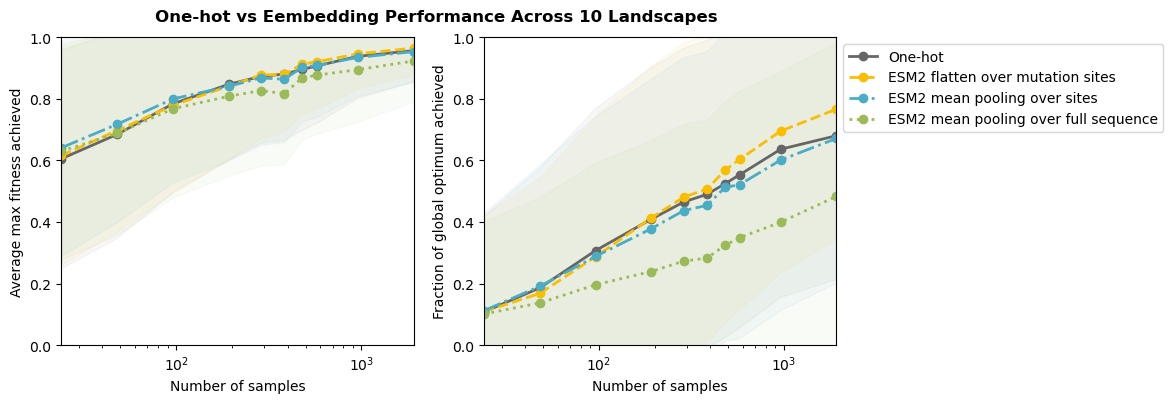

In [54]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness", "Fraction of global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde, n_top, n_mut_cutoff="all", zs=["none"], emb=emb_opt, active_lib_list=active_lib_list
        )
        
        ax.plot(
            mlde_df.index,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            mlde_df.index,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )

    ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel(f"{y_label} achieved")

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

fig.suptitle(
    "One-hot vs Eembedding Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
)

Text(0.5, 0.95, 'One-hot vs Eembedding Performance Across 10 Landscapes')

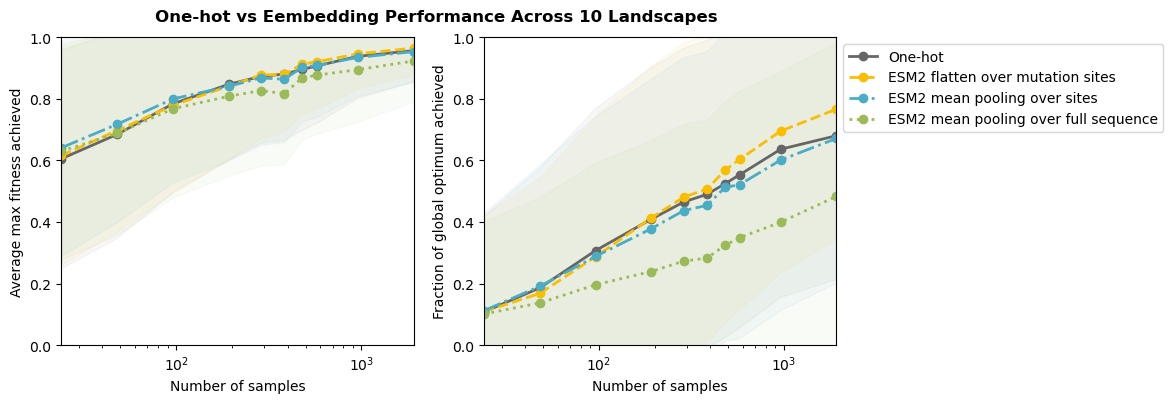

In [55]:

# for avg cross number of samples
n_top = 96
# n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "yellow", "blue", "green"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness", "Fraction of global optimum"],
):

    for i, (emb_opt, ls) in enumerate(encoding_style.items()):
        mlde_df = get_mlde_avg_sdf(
            mlde, n_top, n_mut_cutoff="all", zs=["none"], emb=emb_opt, active_lib_list=active_lib_list
        )
        
        ax.plot(
            mlde_df.index,
            mlde_df[f"{mlde_metric}_mean"],
            marker="o",
            linestyle=ls,
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            label=encoding_des[emb_opt]
        )
        ax.fill_between(
            mlde_df.index,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.05,
        )

    # # add vline
    # ax.axvline(
    #     n_corr,
    #     color="gray",
    #     linewidth=0.5,
    #     linestyle="dotted"
    # )

    ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel(f"{y_label} achieved")

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

fig.suptitle(
    "One-hot vs Eembedding Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
)

In [57]:
def get_mlde_avg_df(mlde_all, n_top, n_mut_cutoff, zs, active_lib_list):
    avg_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"] == zs)
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})
    return avg_mlde

In [59]:
n_top = 96
avg_mlde_df_dict = {}

# just mlde
avg_mlde_df_dict["MLDE"] = get_mlde_avg_df(
    mlde, n_top, n_mut_cutoff="all", zs="none", active_lib_list=active_lib_list
)
avg_mlde_df_dict["ftMLDE: Edited distance"] = get_mlde_avg_df(
    mlde, n_top, n_mut_cutoff="double", zs="none", active_lib_list=active_lib_list
)

for zs in ZS_OPTS[1:]:
    avg_mlde_df_dict[f"ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_df(
        mlde, n_top, n_mut_cutoff="all", zs=zs, active_lib_list=active_lib_list
    )

In [65]:
avg_mlde_df_dict

{'MLDE':    n_sample  top_maxes_mean  top_maxes_std  if_truemaxs_mean  if_truemaxs_std
 0        24        0.622912       0.353133          0.107500         0.309787
 1        48        0.696265       0.327614          0.170500         0.376118
 2        96        0.782031       0.282293          0.269500         0.443756
 3       192        0.833825       0.246031          0.359750         0.479987
 4       288        0.860969       0.221414          0.414000         0.492610
 5       384        0.865167       0.211514          0.448409         0.497388
 6       480        0.894370       0.184542          0.482000         0.499738
 7       576        0.902847       0.174700          0.506500         0.500020
 8       960        0.928029       0.138264          0.582750         0.493167
 9      1920        0.949032       0.106370          0.650000         0.477029,
 'ftMLDE: Edited distance':    n_sample  top_maxes_mean  top_maxes_std  if_truemaxs_mean  if_truemaxs_std
 0        24    

Text(0.5, 0.95, '(ft)MLDE vs DE Performance Across 10 Landscapes')

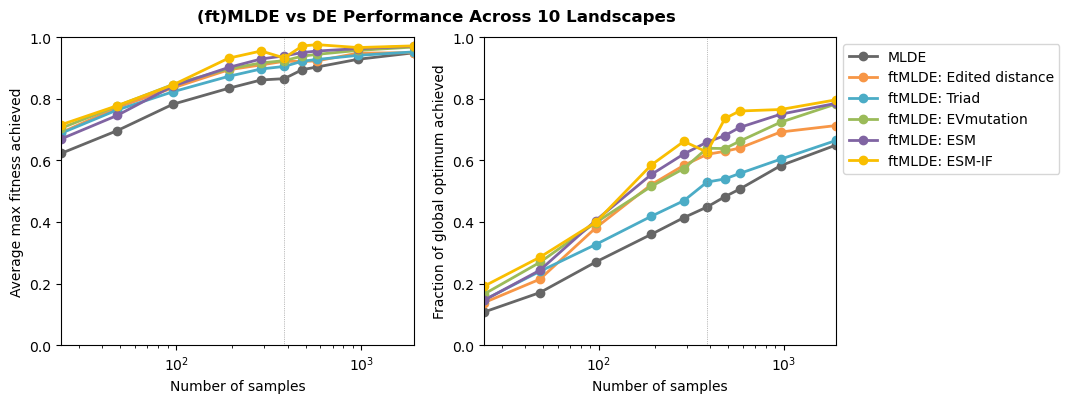

In [66]:
# for avg cross number of samples
n_top = 96
n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = ["gray", "orange", "blue", "green", "purple", "yellow"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness", "Fraction of global optimum"],
):

    for i, (mlde_opts, mlde_df) in enumerate(avg_mlde_df_dict.items()):
        # mlde_df = avg_mlde_df_dict[mlde_opts]
        # if i == 0:
        #     label_app = "Vanilla "
        # else:
        #     label_app = ""
        ax.plot(
            mlde_df["n_sample"],
            mlde_df[f"{mlde_metric}_mean"],
            # label=label_app+mlde_opts,
            label=mlde_opts,
            marker="o",
            linestyle="solid",
            linewidth=2,
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
        )
        ax.fill_between(
            mlde_df.index,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            color=PRESENTATION_PALETTE_SATURATE[mlde_color_list[i]],
            alpha=0.05,
        )

    
    # add vline
    ax.axvline(
        n_corr,
        color="gray",
        linewidth=0.5,
        linestyle="dotted"
    )

    ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel(f"{y_label} achieved")

    if ax == axes[1]:
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

fig.suptitle(
    "(ft)MLDE vs DE Performance Across 10 Landscapes", fontsize=12, fontweight="bold", y=0.95
)

In [21]:
pd.read_csv("results/mlde_ft/vis/all_df.csv")

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,96,500,0,0.166495,0.127217,0.340514,0.151450,0.657485,0.122420,0.0,3489.0,all,DHFR,Triad_score,384,max
1,one-hot,boosting,96,500,1,0.175224,0.128179,0.340514,0.152927,0.661300,0.143166,0.0,5928.0,all,DHFR,Triad_score,384,max
2,one-hot,boosting,96,500,2,0.142594,0.127528,0.340514,0.152332,0.660729,0.133517,0.0,2652.0,all,DHFR,Triad_score,384,max
3,one-hot,boosting,96,500,3,0.166777,0.127778,0.340514,0.152881,0.663913,0.131450,0.0,4413.0,all,DHFR,Triad_score,384,max
4,one-hot,boosting,96,500,4,0.148396,0.126632,0.152167,0.128790,0.645939,0.050567,0.0,6347.0,all,DHFR,Triad_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,one-hot,ridge,384,2243,45,0.553205,-0.026337,0.756122,0.461227,0.986717,0.225595,0.0,2519.0,double,TrpB4,none,96,max
55996,one-hot,ridge,384,2243,46,0.462465,-0.056541,0.746142,0.398490,0.983518,0.211628,0.0,1440.0,double,TrpB4,none,96,max
55997,one-hot,ridge,384,2243,47,0.534350,0.025218,0.746142,0.404551,0.983924,0.211192,0.0,337.0,double,TrpB4,none,96,max
55998,one-hot,ridge,384,2243,48,0.527458,-0.074791,0.777831,0.459937,0.982309,0.217199,0.0,4547.0,double,TrpB4,none,96,max


In [22]:
for zs in ["none"] + ZS_OPTS:
    for lib in mlde["lib"].unique():
        print(zs, lib)
        # print(mlde[(mlde["lib"] == lib) & (mlde["n_top"] == 96) & (mlde["encoding"] != "one-hot")])
        print(sorted(mlde[(mlde["lib"] == lib) & (mlde["n_top"] == 96) & (mlde["encoding"] != "one-hot") & (mlde["zs"] == zs)]["n_sample"].unique()))

none DHFR
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none GB1
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none ParD2
[24, 48, 96, 192, 288, 480, 576, 960, 1920]
none ParD3
[24, 48, 96, 192, 288, 480, 576, 960, 1920]
none TrpB3A
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3B
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3C
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3D
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3E
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3F
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3G
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3H
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3I
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB4
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
ed_score DHFR
[]
ed_score GB1
[]
ed_score ParD2
[]
ed_score ParD3
[]
ed_score TrpB3A
[]
ed_score TrpB3B
[]
ed_score TrpB3C
[]
ed_score TrpB3D
[]
ed_score TrpB3E
[]
